In [1]:
from hypyflow import blocks, PreprocessingPipeline
from scipy.io import loadmat
import numpy as np
patient_number = 190
import os
print(os.getcwd())
cube_path = f"/home/arturo/Practicas/herramientas/data/ID_193_CN_1_Headwall Linescan/LINEimagesID000193C01_cropped_Pre-processed.mat"
cube = loadmat(cube_path)["CI_cube"]

                     _____                                                                    _____ 
                    ( ___ )------------------------------------------------------------------( ___ )
                     |   |                                                                    |   | 
                     |   |  ██░ ██▓██   ██▓ ██▓███ ▓██   ██▓  █████▒██▓     ▒█████   █     █░ |   | 
                     |   | ▓██░ ██▒▒██  ██▒▓██░  ██▒▒██  ██▒▓██   ▒▓██▒    ▒██▒  ██▒▓█░ █ ░█░ |   | 
                     |   | ▒██▀▀██░ ▒██ ██░▓██░ ██▓▒ ▒██ ██░▒████ ░▒██░    ▒██░  ██▒▒█░ █ ░█  |   | 
                     |   | ░▓█ ░██  ░ ▐██▓░▒██▄█▓▒ ▒ ░ ▐██▓░░▓█▒  ░▒██░    ▒██   ██░░█░ █ ░█  |   | 
                     |   | ░▓█▒░██▓ ░ ██▒▓░▒██▒ ░  ░ ░ ██▒▓░░▒█░   ░██████▒░ ████▓▒░░░██▒██▓  |   | 
                     |   |  ▒ ░░▒░▒  ██▒▒▒ ▒▓▒░ ░  ░  ██▒▒▒  ▒ ░   ░ ▒░▓  ░░ ▒░▒░▒░ ░ ▓░▒ ▒   |   | 
                     |   |  ▒ ░▒░ ░▓██ ░▒░ ░▒ ░     ▓██ ░▒░  ░     ░ ░ ▒  ░  ░ ▒ ▒░   ▒ ░ ░

Clicked pixel: (122, 244), Spectral signature: [0.13533835 0.11486486 0.07621951 0.06515581 0.08142494 0.10983982
 0.07462687 0.09197652 0.08657244 0.06913997 0.09707242 0.10518732
 0.07277628 0.11764706 0.09069212 0.05636979 0.12105263 0.09860558
 0.10351377 0.08935018 0.09200344 0.10474632 0.13982718 0.1281296
 0.12836879 0.17667121 0.16041397 0.141257   0.18761062 0.15154994
 0.17324561 0.17497349 0.17875383 0.18549172 0.21280603 0.19465822
 0.22148247 0.21443647 0.20828208 0.18423138 0.21954023 0.18812616
 0.21351156 0.22681134 0.21130552 0.25971905 0.26935179 0.24266749
 0.26352163 0.24913694 0.26058724 0.27783964 0.26851098 0.28720557
 0.28604472 0.28810127 0.29945464 0.29737609 0.29538973 0.31388565
 0.28882272 0.29377649 0.3043956  0.30582629 0.31161712 0.3312513
 0.28797209 0.30885312 0.31103146 0.330617   0.34355119 0.34093479
 0.33770795 0.32809358 0.34799063 0.34236497 0.37139317 0.36802519
 0.36458153 0.34802744 0.34730043 0.36396162 0.38776501 0.36360754
 0.35511364 0.344

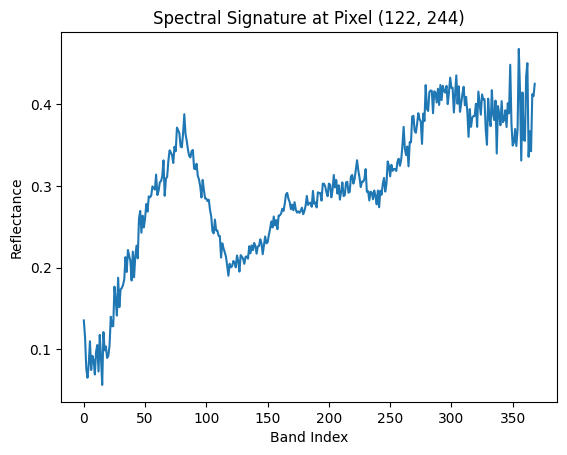

In [5]:
# First let's visualize the information !
from hypyflow import HyperspectralViewer, constants

wavelenghts=constants.HEADWALL_VNIR_WAVELENGHTS
#wavelenghts=constants.XIMEA_SNAPSHOT_V1_WAVELENGHTS # por qué da igual si uso esta constante o la de arriba?

# Create and run the viewer
viewer = HyperspectralViewer(cube, wavelenghts)
viewer.run()


--------------Original data--------------
 - Data shape: (505, 703, 369)
 - Data type: float64
 - Data range: -0.14634146341463414 - 4.203587009209889
 - Data mean: 0.2714504480861907 - Data std: 0.202786373537956
--------------Running Pipeline--------------
 - Running pipeline block: Negative
 - Running pipeline block: Saturated
 - Running pipeline block: RxAnomaly
 - Running pipeline block: Target
Selected area from (51, 83) to (162, 145)
Shape of selected area: (62, 111, 369)
Selected area from (18, 25) to (81, 64)
Shape of selected area: (39, 63, 369)
Selected area from (271, 303) to (271, 303)
Shape of selected area: (0, 0, 369)


/home/arturo/.local/lib/python3.10/site-packages/hypyflow/src/utils.py:176: RuntimeWarning: Mean of empty slice.
  pixel_value = self.selected_area.mean(axis=(0, 1))
/home/arturo/.local/lib/python3.10/site-packages/numpy/core/_methods.py:121: RuntimeWarning: divide by zero encountered in divide
  ret = um.true_divide(
/home/arturo/.local/lib/python3.10/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


Selected area from (264, 275) to (266, 287)
Shape of selected area: (12, 2, 369)
 - Running pipeline block: Normalize
   + Input Data shape: (505, 703, 369)
   + Output Data shape: (505, 703, 369)
--------------Final data--------------
 - Data shape: (505, 703, 369)
 - Data type: float64
 - Data range: 0.0 - 1.0
 - Data mean: 0.02727308877817752 - Data std: 0.10725896804150718
 - Masked pixels 320861 of 355015 (90.38%)
--------------Pipeline finished--------------


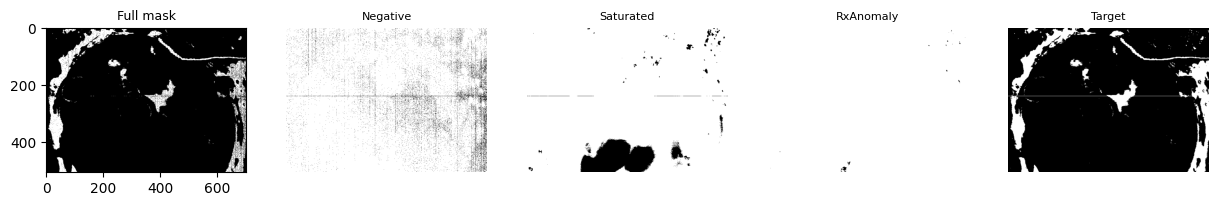

In [6]:
preprocesschain = [
    blocks.MaskNegativeValues(),
    blocks.MaskSaturatedValues(98),
    blocks.ProcessNormalize(type="minmax"),
    #blocks.ProcessDenoise(),
    blocks.MaskRxAnomalyDetection(0.2),
    blocks.MaskTargetSignature(interactive=True,select_area=True,method="SAM"),  
]
pre = PreprocessingPipeline(cube)
filtered_data, full_mask, masks = pre(preprocesschain, verbose=True, plot_masks=True)

np.save(f"../data/masks_{patient_number}.npy", full_mask)

--------------Original data--------------
 - Data shape: (505, 703, 369)
 - Data type: float64
 - Data range: -0.14634146341463414 - 4.203587009209889
 - Data mean: 0.2714504480861907 - Data std: 0.202786373537956
--------------Running Pipeline--------------
 - Using previous mask, skipping masking blocks
 - Running pipeline block: Normalize
   + Input Data shape: (505, 703, 369)
   + Output Data shape: (505, 703, 369)
--------------Final data--------------
 - Data shape: (505, 703, 369)
 - Data type: float64
 - Data range: 0.0 - 1.0
 - Data mean: 0.02727308877817752 - Data std: 0.10725896804150718
 - Masked pixels 320861 of 355015 (90.38%)
--------------Pipeline finished--------------


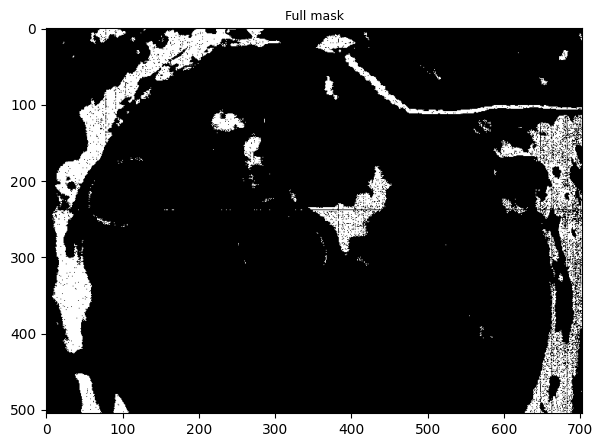

In [7]:
# second time, we can reuse the mask, speeding up the process and allowing to be reproducible
previous_mask = np.load(f"../data/masks_{patient_number}.npy")
filtered_data, full_mask, masks = pre(preprocesschain, verbose=True, plot_masks=True, mask = previous_mask)
# All the black areas are masked out! This saves a lot of time and reduces variation and error in following steps

/home/arturo/Practicas/herramientas/examples
--------------Original data--------------
 - Data shape: (200, 231, 25)
 - Data type: float64
 - Data range: -0.7450045477513872 - 13.15280773209957
 - Data mean: 0.6223691086735114 - Data std: 0.2757104678035579
--------------Running Pipeline--------------
 - Running pipeline block: RxAnomaly
 - Running pipeline block: Negative
 - Running pipeline block: Saturated
 - Running pipeline block: Target
Selected area from (179, 49) to (179, 49)
Shape of selected area: (0, 0, 25)
 - Running pipeline block: Normalize
   + Input Data shape: (200, 231, 25)
   + Output Data shape: (200, 231, 25)
--------------Final data--------------
 - Data shape: (200, 231, 25)
 - Data type: float64
 - Data range: 0.0 - 1.0
 - Data mean: 0.45775979270845707 - Data std: 0.26870992258508475
 - Masked pixels 5744 of 46200 (12.43%)
--------------Pipeline finished--------------


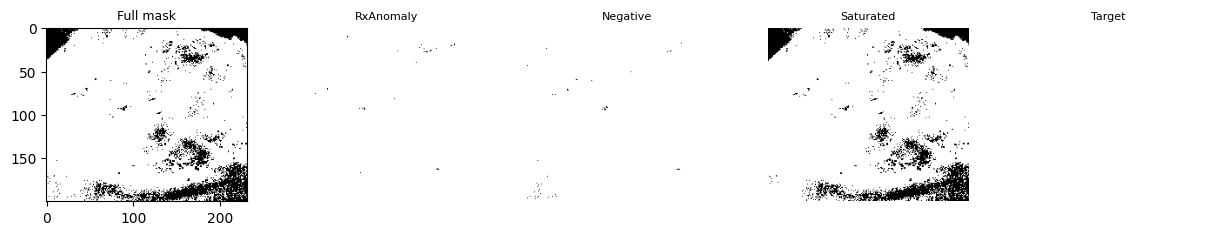

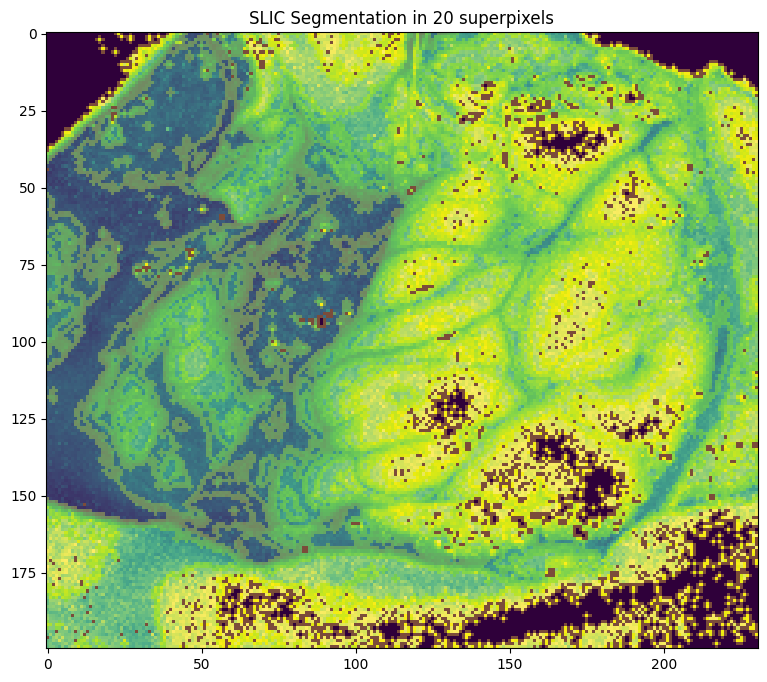

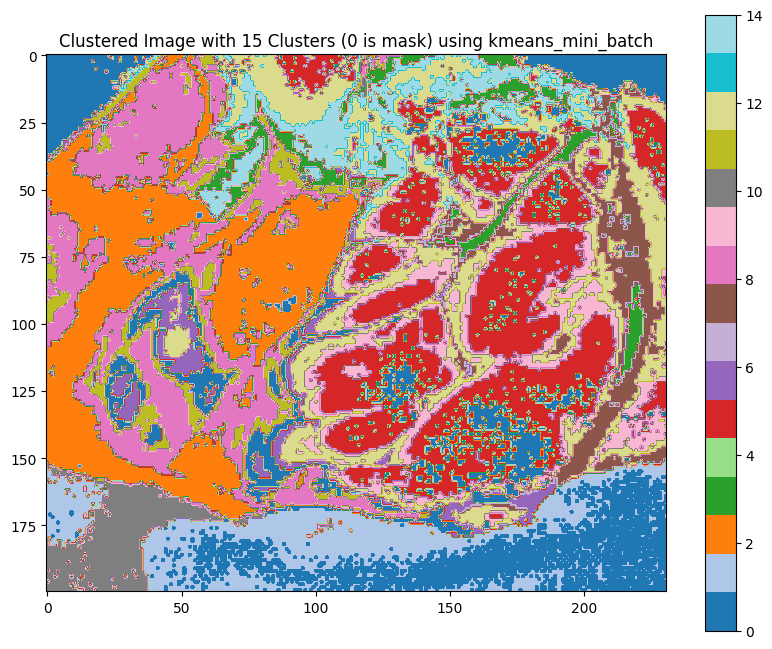

 Reconstruction shape: (200, 231, 25)


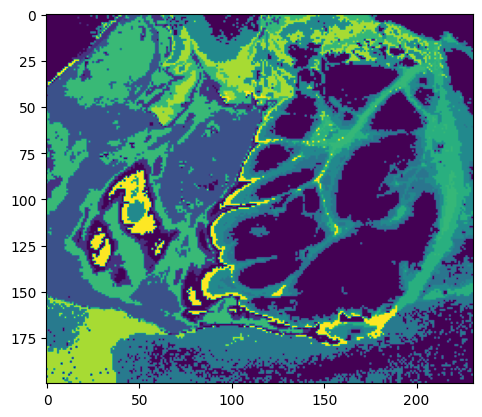

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from hypyflow import SpatialSpectralCluster

def SAM_metric(spectrum1, spectrum2):
    """
    Computes the Spectral Angle Mapper metric between two spectra.
    """
    # Normalize the spectra
    spectrum1 = spectrum1 / np.linalg.norm(spectrum1)
    spectrum2 = spectrum2 / np.linalg.norm(spectrum2)

    # Compute the dot product
    dot_product = np.dot(spectrum1, spectrum2)
    dot_product = np.clip(dot_product, -1.0, 1.0)

    # Compute the angle
    angle = np.arccos(dot_product)

    return angle



from scipy.io import loadmat
from hypyflow import blocks, PreprocessingPipeline

patient_number = 190
import os
print(os.getcwd())
#cube_path = "../data/ID_190_CN_2_Ximea Snapshot/SNAPimagesID000190C02_cropped_Pre-processed.mat"
#cube_path = f"../data/ID_{patient_number}_CN_1_Headwall Linescan/LINEimagesID000{patient_number}C01_cropped_Pre-processed.mat"
cube_path = "../data/ID_142_CN_2_Ximea Snapshot/SNAPimagesID000142C02_cropped_Pre-processed.mat"

cube = loadmat(cube_path)["CI_cube"]


preprocesschain = [
    blocks.MaskRxAnomalyDetection(0.2),
    blocks.MaskNegativeValues(),
    blocks.ProcessNormalize(type="minmax"),
    blocks.MaskSaturatedValues(98), 
    blocks.MaskTargetSignature(interactive=True,select_area=True,method="SAM"),
    #blocks.ProcessReduceDimensionality(method="PCA", explained_variance_threshold=98), #en lugar de usar explained_variance_threshold, usar n_components para seleccionar las bandas y no la varianza
    #blocks.ProcessDenoise()

]
pre = PreprocessingPipeline(cube)
filtered_data, full_mask, masks = pre(preprocesschain, verbose=True, plot_masks=True)


cube = filtered_data

processer = SpatialSpectralCluster(20,0.1,15, k_method="kmeans_mini_batch")
reductor = SpatialSpectralCluster(slic_n_segments=100, slic_compactness=0.1, k_n_clusters=40, k_method="kmedoids", kmed_metric=SAM_metric)
final_data,slic_cluster_img,  kmed_cluster_img=processer.run(cube, mask=full_mask, plot=True)

reconstructed= processer.reconstruct(final_data)

print(f" Reconstruction shape: {reconstructed.shape}")

plt.imshow(reconstructed[:,:,0])
plt.show()
